In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Model

In [ ]:
data=pd.read_csv("ner_dataset.csv",encoding="latin1")

In [ ]:
data.head(50)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


In [ ]:
data=data.fillna(method="ffill")

In [ ]:
data.head(50)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [ ]:
words=list(data["Word"].unique())
words.append("ENDPAD")
tags=list(data["Tag"].unique())

In [ ]:
num_words=len(words)
num_tag=len(tags)

In [ ]:
class SentenceGetter(object):
  def __init__(self,data):
    self.n_sent=1
    self.data=data
    self.empty=False
    agg_func=lambda s:[(w,p,t) for w, p, t in zip(s["Word"].values.tolist(),
                                                  s["POS"].values.tolist(),
                                                  s["Tag"].values.tolist())]
    self.grouped=self.data.groupby("Sentence #").apply(agg_func)
    self.sentences=[s for s in self.grouped]
  def get_next(self):
    try:
      s=self.grouped["Senatence: {}".format(self.n_sent)]
      self.n_sent+=1
      return s
    except:
      return none

In [ ]:
getter=SentenceGetter(data)
sentences=getter.sentences

In [ ]:
len(sentences)

47959

In [ ]:
sentences

[[('Thousands', 'NNS', 'O'),
  ('of', 'IN', 'O'),
  ('demonstrators', 'NNS', 'O'),
  ('have', 'VBP', 'O'),
  ('marched', 'VBN', 'O'),
  ('through', 'IN', 'O'),
  ('London', 'NNP', 'B-geo'),
  ('to', 'TO', 'O'),
  ('protest', 'VB', 'O'),
  ('the', 'DT', 'O'),
  ('war', 'NN', 'O'),
  ('in', 'IN', 'O'),
  ('Iraq', 'NNP', 'B-geo'),
  ('and', 'CC', 'O'),
  ('demand', 'VB', 'O'),
  ('the', 'DT', 'O'),
  ('withdrawal', 'NN', 'O'),
  ('of', 'IN', 'O'),
  ('British', 'JJ', 'B-gpe'),
  ('troops', 'NNS', 'O'),
  ('from', 'IN', 'O'),
  ('that', 'DT', 'O'),
  ('country', 'NN', 'O'),
  ('.', '.', 'O')],
 [('Iranian', 'JJ', 'B-gpe'),
  ('officials', 'NNS', 'O'),
  ('say', 'VBP', 'O'),
  ('they', 'PRP', 'O'),
  ('expect', 'VBP', 'O'),
  ('to', 'TO', 'O'),
  ('get', 'VB', 'O'),
  ('access', 'NN', 'O'),
  ('to', 'TO', 'O'),
  ('sealed', 'JJ', 'O'),
  ('sensitive', 'JJ', 'O'),
  ('parts', 'NNS', 'O'),
  ('of', 'IN', 'O'),
  ('the', 'DT', 'O'),
  ('plant', 'NN', 'O'),
  ('Wednesday', 'NNP', 'B-tim'),
  ('

In [ ]:
word2Idx={w: i+1 for i,w in enumerate(words)}
tag2Idx={t: i for i,t in enumerate(tags)}

In [ ]:
tag2Idx

{'O': 0,
 'B-geo': 1,
 'B-gpe': 2,
 'B-per': 3,
 'I-geo': 4,
 'B-org': 5,
 'I-org': 6,
 'B-tim': 7,
 'B-art': 8,
 'I-art': 9,
 'I-per': 10,
 'I-gpe': 11,
 'I-tim': 12,
 'B-nat': 13,
 'B-eve': 14,
 'I-eve': 15,
 'I-nat': 16}

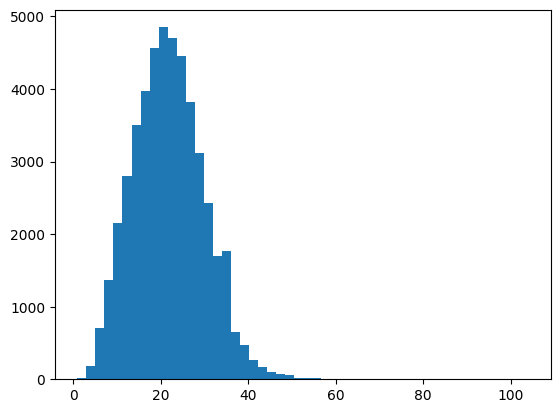

In [ ]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [ ]:
x1=[[word2Idx[w[0]] for w in s] for s in sentences]

In [ ]:
x1[0]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 10,
 16,
 2,
 17,
 18,
 19,
 20,
 21,
 22]

In [ ]:
max_len=50

In [ ]:
X=sequence.pad_sequences(maxlen=max_len,
                         sequences=x1,padding="post",
                         value=num_words-1)

In [ ]:
X[0]

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    10,    16,     2,
          17,    18,    19,    20,    21,    22, 35177, 35177, 35177,
       35177, 35177, 35177, 35177, 35177, 35177, 35177, 35177, 35177,
       35177, 35177, 35177, 35177, 35177, 35177, 35177, 35177, 35177,
       35177, 35177, 35177, 35177, 35177], dtype=int32)

In [ ]:
y1=[[tag2Idx[w[2]] for w in s]for s in sentences]

In [ ]:
y=sequence.pad_sequences(maxlen=max_len,
                          sequences=y1,
                          padding="post",
                          value=tag2Idx["O"])


In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 7, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 6, ..., 0, 0, 0]], dtype=int32)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
x_train[0]

array([  841,   803,   804, 20239, 22529,    79,     8,  4285,    32,
         497,  2579,  1650,    94, 15619,  3521, 22530,    94,    12,
        1564,     8,   765, 10417,  2866,    12,    10,   188,    14,
       18905,   550,    22, 35177, 35177, 35177, 35177, 35177, 35177,
       35177, 35177, 35177, 35177, 35177, 35177, 35177, 35177, 35177,
       35177, 35177, 35177, 35177, 35177], dtype=int32)

In [ ]:
y_train[0]

array([ 2,  0,  3, 10, 10,  0,  0,  0,  0,  0,  2,  0,  0,  3, 10, 10,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

In [ ]:
input_word=layers.Input(shape=(max_len,))

embedding_layer=layers.Embedding(input_dim=num_words,
                                 output_dim=50,
                                 input_length=max_len
)(input_word)

dropout_layer=layers.SpatialDropout1D(0.1)(embedding_layer)
bidirectional_lstm=layers.Bidirectional(
    layers.LSTM(units=100,
                return_sequences=True,
                recurrent_dropout=0.1)
)(dropout_layer)

output=layers.TimeDistributed(
    layers.Dense(num_tag,activation="softmax")
)(bidirectional_lstm)

model=Model(input_word,output)

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history=model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    batch_size=32,
    epochs=3,
)

Epoch 1/3
1050/1050 [==============================] - 243s 226ms/step - loss: 0.1940 - accuracy: 0.9553 - val_loss: 0.0719 - val_accuracy: 0.9796
Epoch 2/3
1050/1050 [==============================] - 237s 226ms/step - loss: 0.0541 - accuracy: 0.9842 - val_loss: 0.0521 - val_accuracy: 0.9846
Epoch 3/3
1050/1050 [==============================] - 235s 224ms/step - loss: 0.0386 - accuracy: 0.9882 - val_loss: 0.0494 - val_accuracy: 0.9852


In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()


,loss,accuracy,val_loss,val_accuracy
0,0.194009,0.955339,0.071908,0.979647
1,0.054077,0.984192,0.052092,0.984580
2,0.038618,0.988195,0.049381,0.985246


<Axes: >

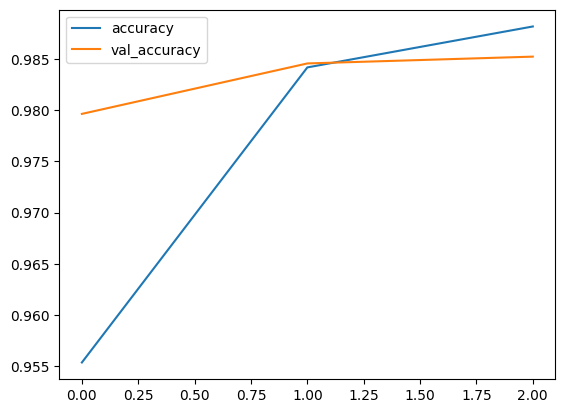

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

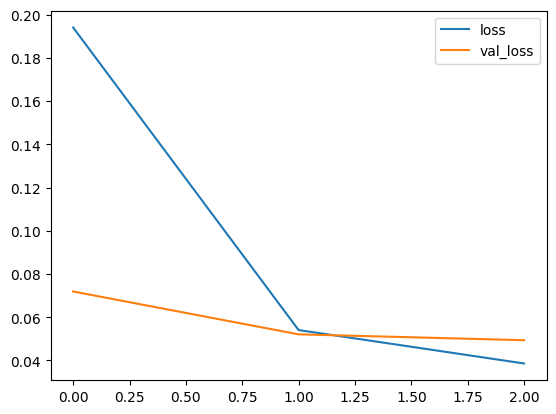

In [ ]:
metrics[['loss','val_loss']].plot()

In [38]:
print("Name: Priyadharshan S")
print("Ref no.: 212223240127")
i = 20
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

Name: Priyadharshan S
Ref no.: 212223240127
1/1 [==============================] - 0s 215ms/step
Word           True 	 Pred

------------------------------
The            O	O
leader         O	O
of             O	O
Al-Qaida       B-org	B-org
in             O	O
Iraq           B-geo	B-geo
has            O	O
called         O	O
on             O	O
weapons        O	O
experts        O	O
to             O	O
supply         O	O
his            O	O
fighters       O	O
with           O	O
biological     O	O
weapons        O	O
and            O	O
dirty          O	O
bombs          O	O
.              O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel     